In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [46]:
path = 'C:\\Users\\86187\\Desktop\\blockchain-go-demo-main\\machine-learning\\notebook\\WZ-ML\\dataset\\regress_data1.csv'
data = pd.read_csv(path)#单个变量线性回归
data.head()

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [47]:
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


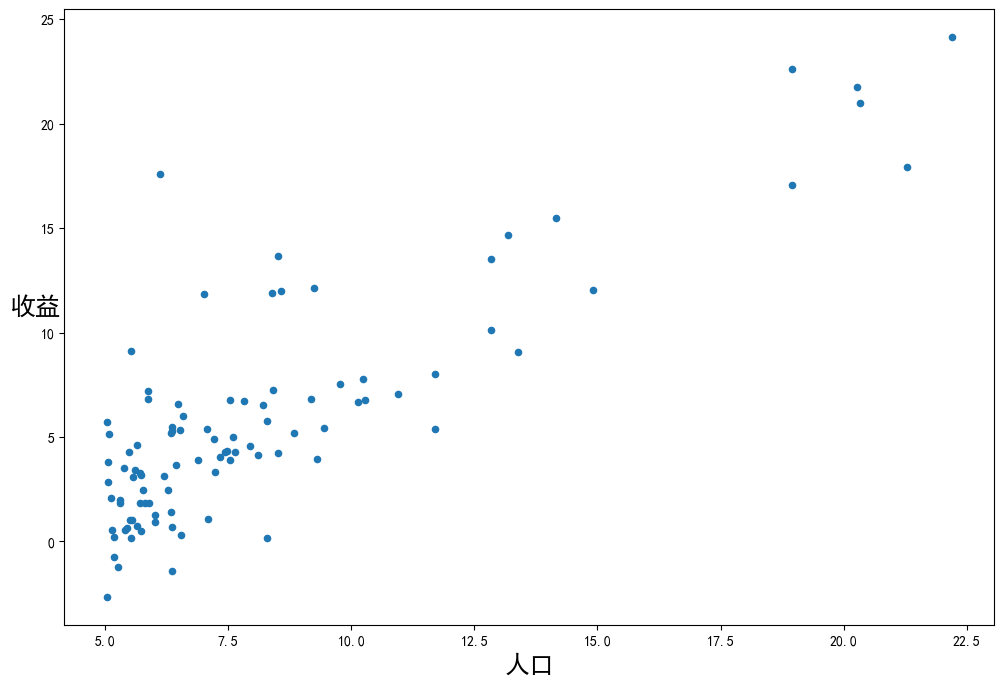

In [48]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(12,8))
plt.xlabel('人口', fontsize=18)
plt.ylabel('收益', rotation=0, fontsize=18)
plt.show()

In [49]:
#计算代价函数(计算一次叫做代价函数，两次及以上叫损失函数)
def computeCost(X, y, w):
    inner = np.power(((X * w.T) - y), 2)# (m,n) @ (n, 1) -> (n, 1)
#     return np.sum(inner) / (2 * len(X))
    return np.sum(inner) / (2 * X.shape[0])

In [50]:
#在训练集中添加一列，以便我们可以使用向量化
data.insert(0, 'Ones', 1)
data

,Ones,人口,收益
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [51]:
# set X (training data) and y (target variable),X就是训练数据的值，y就是标签取出来
cols = data.shape[1]
X = data.iloc[:,:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:]#X是所有行，最后一列

In [52]:
X.head()

,Ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [53]:
y.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [54]:
#代价函数是应该是numpy矩阵，所以我们需要转换X和Y,还需要初始化w
X = np.matrix(X.values)
y = np.matrix(y.values)
w = np.matrix(np.array([0,0]))

In [55]:
w

matrix([[0, 0]])

In [56]:
X.shape, w.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [57]:
computeCost(X, y, w)#代价函数算一次的

32.072733877455676

In [58]:
#批量梯度下降
def batch_gradientDescent(X, y, w, alpha, iters):
    temp = np.matrix(np.zeros(w.shape))#创建了一个元素全为0，形状雨Numpy数组w相同的矩阵
    parameters = int(w.ravel().shape[1])#将w展成一维数组
    cost = np.zeros(iters)#cost将用于存储每一次迭代中的损失函数值。

    for i in range(iters):
        error = (X * w.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = w[0, j] - ((alpha / len(X)) * np.sum(term))

        w = temp
        cost[i] = computeCost(X, y, w)

    return w, cost

In [59]:
alpha = 0.01
iters = 1000

In [60]:
g, cost = batch_gradientDescent(X, y, w, alpha, iters)
g#就是函数的权重

matrix([[-3.24140214,  1.1272942 ]])

In [61]:
computeCost(X, y, g)#拟合的参数计算训练模型的代价函数（误差）

4.515955503078914

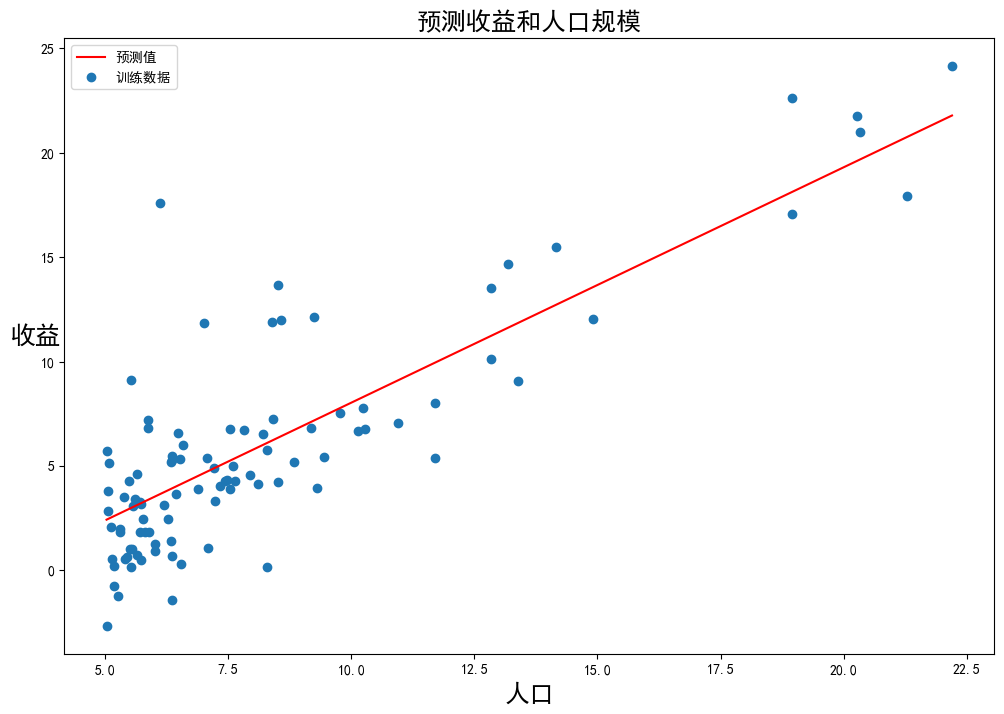

In [62]:
x = np.linspace(data['人口'].min(), data['人口'].max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

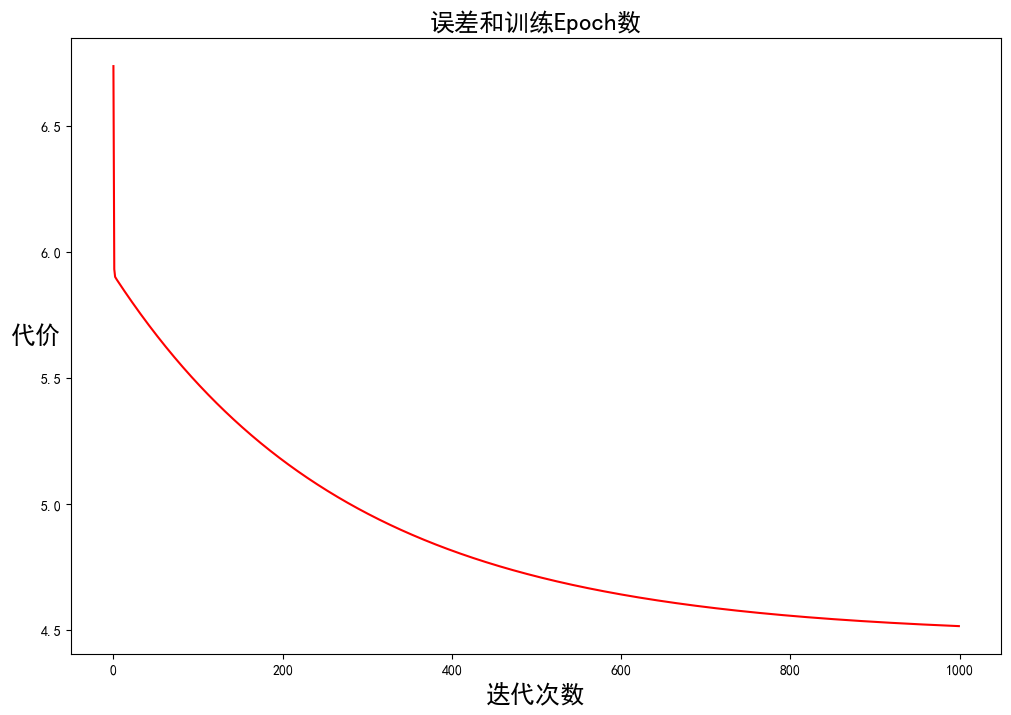

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
ax.set_title('误差和训练Epoch数', fontsize=18)
plt.show()

In [64]:
#多变量线性回归
path = 'C:\\Users\\86187\\Desktop\\blockchain-go-demo-main\\machine-learning\\notebook\\WZ-ML\\dataset\\regress_data2.csv'
data2 = pd.read_csv(path)
data2.head()

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [65]:
# 预处理步骤 - 特征归一化
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [66]:
# 增加一列做为偏置项，跟前面操作一样
data2.insert(0, 'Ones', 1)

# 获取X训练数据，以及y的标签
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# 转换矩阵类型，然后初始化权重
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
w2 = np.matrix(np.array([0,0,0]))

# # 对数据集进行线性回归梯度下降操作，得到最好的权重系数
g2, cost2 = batch_gradientDescent(X2, y2, w2, alpha, iters)

# 获取当前的成本损失
computeCost(X2, y2, g2)

0.13070336960771892

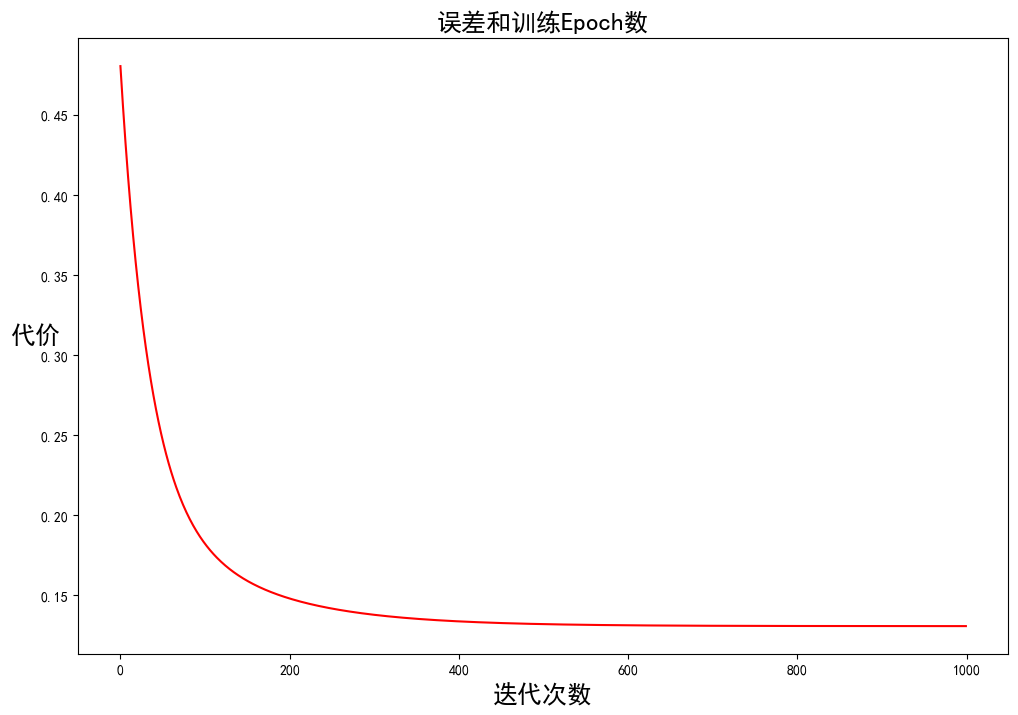

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
ax.set_title('误差和训练Epoch数', fontsize=18)
plt.show()

In [76]:
#sklearn实现线性回归
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = np.asarray(X)
y = np.asarray(y)
model.fit(X, y)

LinearRegression()

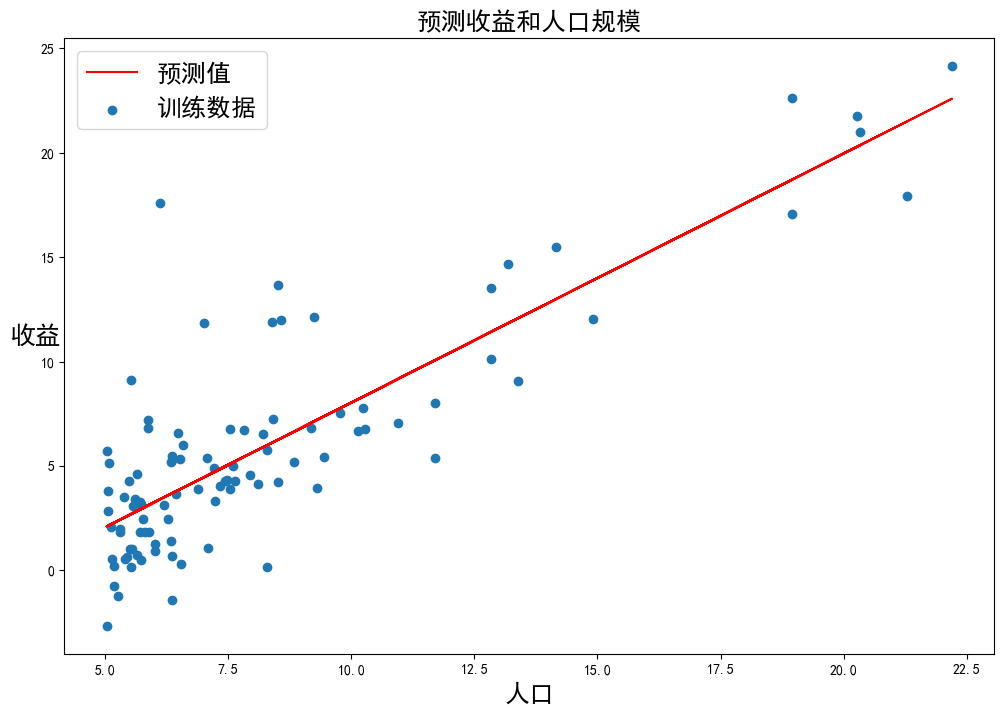

In [78]:
x = np.array(X[:, 1])
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

In [79]:
#L2正则化
from sklearn.linear_model import Ridge
model = Ridge()#添加了正则化的模型
model.fit(X, y)

Ridge()

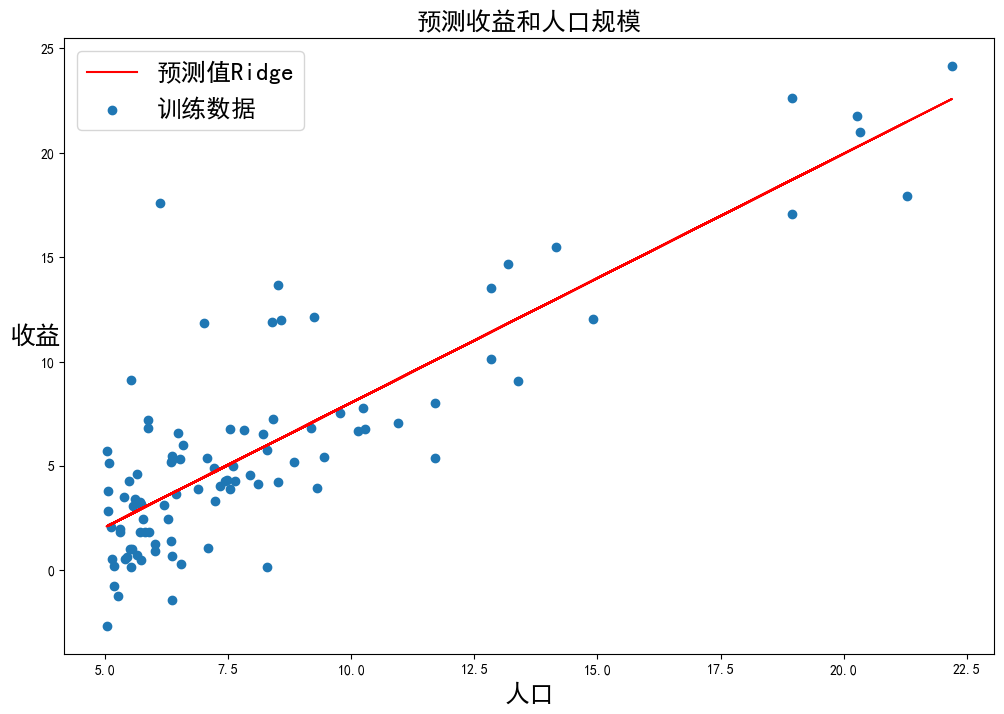

In [80]:
x2 = np.array(X[:, 1])
f2 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x2, f2, 'r', label='预测值Ridge')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

In [81]:
#L1正则化
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X, y)

Lasso()

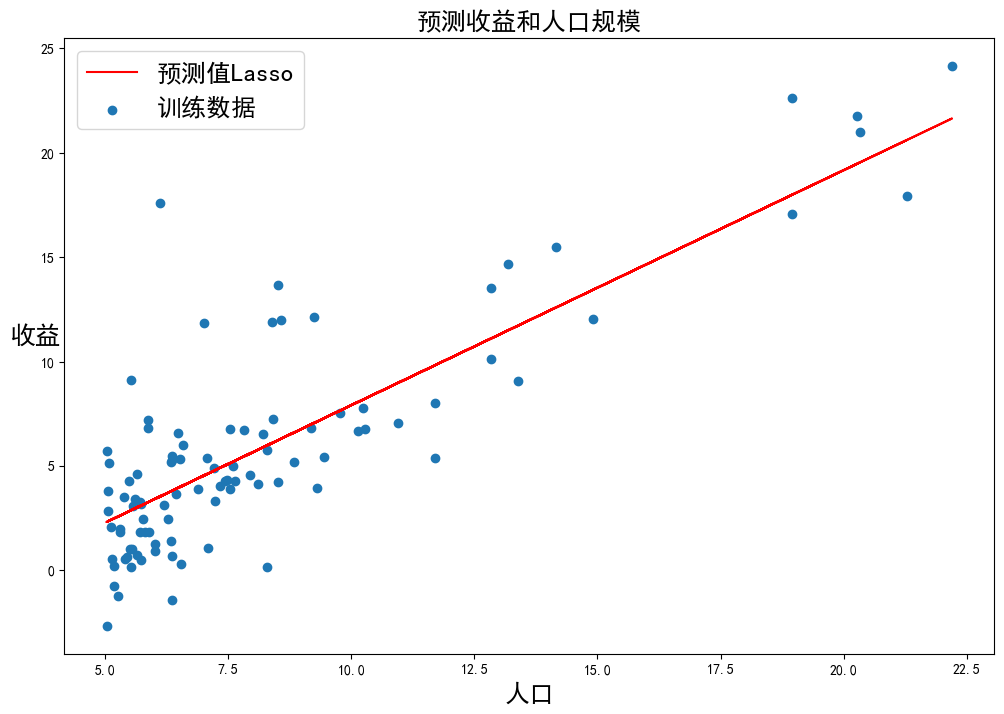

In [82]:
x3= np.array(X[:, 1])
f3 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x3, f3, 'r', label='预测值Lasso')
ax.scatter(data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('人口', fontsize=18)
ax.set_ylabel('收益', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

In [83]:
#最小二乘法
def LSM(X, y):
    w = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return w

In [85]:
final_w2=LSM(X, y)#最小二乘法算出来的权重，#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])
final_w2

array([[-3.89578088],
       [ 1.19303364]])